# **House Price Prediction with Linear Regression and Random Forest**

The aim of this project is to predict real-estate prices using the machine learning algorithm, Linear Regression, Random Forest. Both will show different results for the accuracy. Also, I will use regression with regularization such as Ridge and Lasso to try to improve the prediction accuracy.

# **Imports**

In [ ]:
from bs4 import BeautifulSoup as bs4
from requests import get
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import numpy as np
%matplotlib inline
#from fake_useragent import UserAgent

# **Data preparation (Web scraping)**

Scraping data from the first website - 'FriendlyHousing'

In [ ]:
url_1 = 'https://www.friendlyhousing.nl/nl/aanbod/kamer'
url_2 = 'https://www.friendlyhousing.nl/nl/aanbod/studio'
url_3 = 'https://www.friendlyhousing.nl/nl/aanbod/appartement'
urls= [url_1, url_2, url_3]

Scraping data from the second website - 'Pararius'

In [ ]:
url_1p = 'https://www.pararius.com/apartments/eindhoven'
url_2p = 'https://www.pararius.com/apartments/eindhoven/page-2'
url_3p = 'https://www.pararius.com/apartments/eindhoven/page-3'
urls_p= [url_1p, url_2p, url_3p]


'FriendlyHousing'

In [ ]:
#user_agent = UserAgent()
#headers={"user-agent": user_agent.chrome}
soup_array=[]
for url in urls:
    ## getting the reponse from the page using get method of requests module
    page = get(url)

    ## storing the content of the page in a variable
    html = page.content

    ## creating BeautifulSoup object
    soup = bs4(html, "html.parser")
    soup_array.append(soup)

'Pararius'

In [ ]:
soup_array_p=[]
for url in urls_p:
    ## getting the reponse from the page using get method of requests module
    page = get(url)

    ## storing the content of the page in a variable
    html = page.content

    ## creating BeautifulSoup object
    soup = bs4(html, "html.parser")
    soup_array_p.append(soup)

'FriendlyHousing' - finding the elements from the html file

In [ ]:
houses=[]
for s in soup_array:
    allHouses = s.find("ul", {"class": "list list-unstyled row equal-row"})
    #print(len(allHouses))
    for h in allHouses.find_all("li", {"class": "col-xs-12 col-sm-6 col-md-4 equal-col"}):
     # print(h)
      
      houses.append(h)
     # print(h.findAll("li", {"class": "search-list__item search-list__item--listing"}))
      

In [ ]:
catalog=[]
for h in houses:
  #data['houses'].append({
      type__= h.find('div', class_= 'specs').text
      t = type__.split()
      type_=t[0]
      street_ = h.find('h3').text
      s = street_.split()
      street = s[0]
      address = h.find('p').text
      a = address.split()
      postcode = a[0]
      #city = a[2]
      price = h.find('div', class_= 'price').text
      vars = type_,street, postcode, price
      catalog.append(vars)
      #print(city)

'Pararius' - finding the elements from the html file

In [ ]:
houses_p=[]
for s in soup_array_p:
    allHouses = s.find("ul", {"class": "search-list"})
    #print(len(allHouses))
    for h in allHouses.find_all("li", {"class": "search-list__item search-list__item--listing"}):
     # print(h)
      
      houses_p.append(h)
     # print(h.findAll("li", {"class": "search-list__item search-list__item--listing"}))
      

In [ ]:
catalog_p=[]
for h in houses_p:
  #data['houses'].append({
        name = h.find('a',class_='listing-search-item__link listing-search-item__link--title').text
        _name = name.split()
        house_type = _name[0]
        street = _name[1]
        _address= h.findAll('div', class_='listing-search-item__location')[0].text
        #String manipulation to remove the unwanted signs from the address
        __address = _address.replace("\nnew\n ", "") 
        address = __address.replace("\n ", "")   #actual address after string manipulation - ready to be used in the exploring of the data
        new_address = address.split()
        postcode = new_address[0] 
        price_ = h.findAll('span', class_='listing-search-item__price')[0].text
        #splitting the string to find the price
        p=price_.split()
        _price = p[0] #actual price before string manipulation
        __price = _price.replace("€", "")  #actual price before full string manipulation
        price = __price.replace(",", "")   #actual price after string manipulation - ready to be used in the exploring of the data

        #finding the whole element from the web page
        ylr= h.findAll('section', class_= 'illustrated-features illustrated-features--vertical')[0].text 

        #splitting the string to find the living are, rooms and year
        lry= ylr.split()

        #living_area after taking the indexes that define it
        living_area = lry[0] 

        #rooms after taking the index that defines the variable
        rooms = lry[4] 
    
        vars = house_type, street, postcode,price,living_area,rooms
        catalog_p.append(vars)
    
print(catalog_p)


[('House', 'Nieuwe', '5612', '1150', '65', '3'), ('Apartment', 'Vrijstraat', '5611', '1750', '90', '2'), ('Room', 'Schootsestraat', '5616', '445', '10', '1'), ('Apartment', 'Jeroen', '5642', '1195', '75', '3'), ('Apartment', 'De', '5612', '423', '20', '2'), ('Apartment', 'Bomansplaats', '5611', '545', '19', '2'), ('Apartment', 'Emmasingel', '5611', '2500', '135', '3'), ('Apartment', 'Geldropseweg', '5611', '1195', '75', '3'), ('Apartment', 'Limburglaan', '5616', '804', '50', '2'), ('Apartment', 'Kruisstraat', '5612', '895', '39', '1'), ('Apartment', 'St', '5614', '675', '18', '1'), ('Apartment', 'Trompstraat', '5612', '1475', '80', '3'), ('Apartment', 'Gabriël', '5611', '1140', '63', '3'), ('Apartment', 'Aalsterweg', '5615', '795', '45', '2'), ('House', 'Jacob', '5611', '4500', '169', '7'), ('Room', 'Eckartseweg', '5623', '360', '10', '1'), ('Apartment', 'Hertogstraat', '5611', '1200', '100', '1'), ('Apartment', 'Jeroen', '5613', '750', '40', '2'), ('Apartment', 'De', '5611', '1349', '

'FriendlyHousing' - creating the dataframe

In [ ]:
dataframe = pd.DataFrame(catalog)
dataframe.columns=['TYPE', 'STREET NAME', 'POSTCODE', 'PRICE'] 
dataframe 

,TYPE,STREET NAME,POSTCODE,PRICE
0,Kamer,Willem,5611,320
1,Kamer,Willem,5611,310
2,Kamer,Julianastraat,5611,375
3,Kamer,Bennekelstraat,5654,430
4,Kamer,Leenderweg,5615,415
...,...,...,...,...
114,Appartement,Frankrijkstraat,5622,925
115,Appartement,Kerkakkerstraat,5616,950
116,Appartement,Leenderweg,5614,800
117,Appartement,Leostraat,5615,775


'Pararius'- creating the dataframe

In [ ]:
df_ = pd.DataFrame(catalog_p)
df_.columns=['TYPE', 'STREET NAME', 'POSTCODE', 'PRICE','LIVING_AREA', 'ROOMS'] 
df_ 

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,House,Nieuwe,5612,1150,65,3
1,Apartment,Vrijstraat,5611,1750,90,2
2,Room,Schootsestraat,5616,445,10,1
3,Apartment,Jeroen,5642,1195,75,3
4,Apartment,De,5612,423,20,2
...,...,...,...,...,...,...
88,House,Grote,5632,1290,115,4
89,Room,Sebastiaan,5622,475,14,1
90,House,van,5612,1500,108,5
91,Room,Aalsterweg,5615,360,16,1


# **Data integration**



> Using concat to create a `Union` between the two datasets and then, integrate them into one dataset.



In [ ]:
frames = [dataframe, df_]

In [ ]:
df = pd.concat(frames)
df

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Kamer,Willem,5611,320,NaN,NaN
1,Kamer,Willem,5611,310,NaN,NaN
2,Kamer,Julianastraat,5611,375,NaN,NaN
3,Kamer,Bennekelstraat,5654,430,NaN,NaN
4,Kamer,Leenderweg,5615,415,NaN,NaN
...,...,...,...,...,...,...
88,House,Grote,5632,1290,115,4
89,Room,Sebastiaan,5622,475,14,1
90,House,van,5612,1500,108,5
91,Room,Aalsterweg,5615,360,16,1


# **Data analysis**



Checking the dimension of the dataset and the features.





In [ ]:
# Check the dimension of the dataset
df.shape

(212, 6)

>The dataset has 219 observations and 6 features, but the observations(rows) will change with time because the data is scraped and this means it is up to date. Whenever there is a change on the websites, there is a change in the dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 92
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TYPE         212 non-null    object
 1   STREET NAME  212 non-null    object
 2   POSTCODE     212 non-null    object
 3   PRICE        212 non-null    object
 4   LIVING_AREA  93 non-null     object
 5   ROOMS        93 non-null     object
dtypes: object(6)
memory usage: 11.6+ KB


>It can be seen that none features are numeric, but objects. Later, they will have to be converted into either float or int in order to be plotted and then used for the trainig of the models. There are also missing values in the dataset.

There are missing values in the dataset, which appeared after the data integration of the two datasets. This will be fixed later before the training of the models.

In [ ]:
df.isnull().sum()

TYPE             0
STREET NAME      0
POSTCODE         0
PRICE            0
LIVING_AREA    119
ROOMS          119
dtype: int64

In [ ]:
# Find columns with missing values and their percent missing
df.isnull().sum()                                                     
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0].style.background_gradient(cmap='Reds')
miss_val

,MissvalCount,Percent
ROOMS,119,56.13
LIVING_AREA,119,56.13


>The light red color shows the small amount of NaN values. If the features were with a high percent of missing values, they would have to be removed. Yet, in this case, they have relatively low percentage so they can be used in future. Then, the NaN values will be replaced.

In [ ]:
#Description of the dataset
df.describe()

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
count,212,212,212,212,93,93
unique,6,107,25,123,51,6
top,Apartment,Leenderweg,5611,415,75,2
freq,69,9,47,15,6,30


In [ ]:
#First 5 rows of our dataset
df.head()

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
0,Kamer,Willem,5611,320,NaN,NaN
1,Kamer,Willem,5611,310,NaN,NaN
2,Kamer,Julianastraat,5611,375,NaN,NaN
3,Kamer,Bennekelstraat,5654,430,NaN,NaN
4,Kamer,Leenderweg,5615,415,NaN,NaN


In [ ]:
#Last 5 rows of our dataset
df.tail()

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
88,House,Grote,5632,1290,115,4
89,Room,Sebastiaan,5622,475,14,1
90,House,van,5612,1500,108,5
91,Room,Aalsterweg,5615,360,16,1
92,House,Landgraaf,5658,1350,113,5


In [ ]:
df['TYPE'].value_counts()

Apartment      69
Kamer          47
Studio         36
Appartement    36
House          16
Room            8
Name: TYPE, dtype: int64

In [ ]:
df.iloc[0]

TYPE            Kamer
STREET NAME    Willem
POSTCODE         5611
PRICE             320
LIVING_AREA       NaN
ROOMS             NaN
Name: 0, dtype: object

In [ ]:
df.groupby('POSTCODE').count()

,TYPE,STREET NAME,PRICE,LIVING_AREA,ROOMS
POSTCODE,,,,,
5503,1,1,1,0,0
5611,47,47,47,30,30
5612,30,30,30,14,14
5613,9,9,9,4,4
5614,13,13,13,2,2
5615,15,15,15,7,7
5616,8,8,8,6,6
5617,1,1,1,1,1
5621,8,8,8,1,1


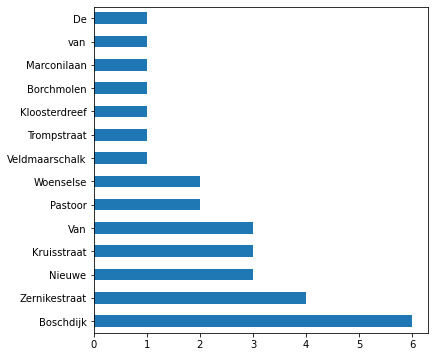

In [ ]:
df[(df['POSTCODE'] == '5612')]['STREET NAME'].value_counts().plot(kind='barh', figsize=(6, 6))

Sorting the data by `Type`.

In [ ]:
df.sort_values('TYPE', ascending = True)

,TYPE,STREET NAME,POSTCODE,PRICE,LIVING_AREA,ROOMS
29,Apartment,Bomanshof,5611,1385,79,2
34,Apartment,Bomanshof,5611,1100,50,2
35,Apartment,Bomanshof,5611,1260,63,2
36,Apartment,Bomanshof,5611,1460,86,2
37,Apartment,Kruisstraat,5612,950,45,2
...,...,...,...,...,...,...
51,Studio,Van,5612,592,NaN,NaN
50,Studio,Boschdijk,5612,570,NaN,NaN
67,Studio,Zernikestraat,5612,590,NaN,NaN
52,Studio,Aalsterweg,5615,500,NaN,NaN



**Pre Processing**

Handling Outlier

> An **outlier** is a data point in a data set that is distant from all other observations (a data point that lies outside the overall distribution of the dataset.)

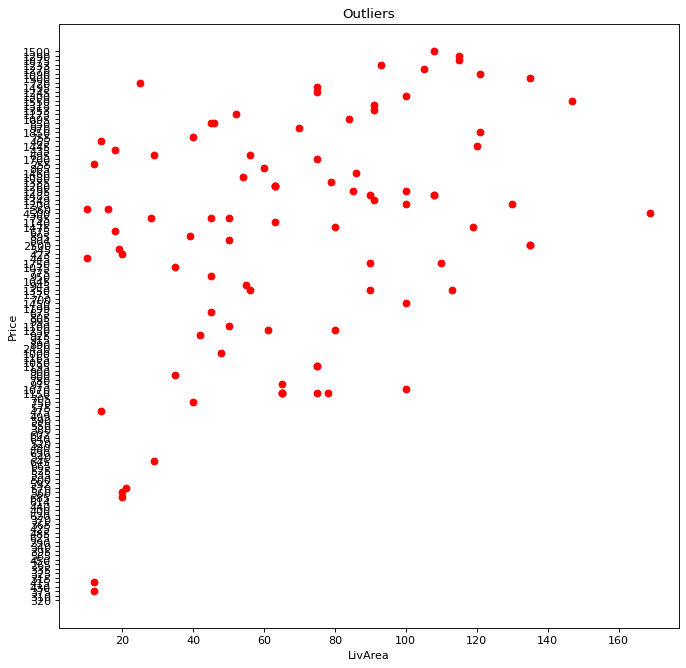

In [ ]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(df.LIVING_AREA, df.PRICE, c= 'red')
plt.title("Outliers")
plt.xlabel("LivArea")
plt.ylabel("Price")
plt.show()

In [ ]:
df['PRICE'] =df['PRICE'].astype(float)
df['POSTCODE'] =df['POSTCODE'].astype(int)
df['LIVING_AREA'] =df['LIVING_AREA'].astype(float)
df['ROOMS'] =df['ROOMS'].astype(float)
code_numeric = {'Kamer': 5,'Apartment': 1, 'Appartement': 1, 'Room': 2, 'Studio': 4, 'House': 3}
df ['TYPE'] = df['TYPE'].map(code_numeric)
df['TYPE'] =df['TYPE'].astype(float)

In [ ]:
df['PRICE'] =df['PRICE'].astype(float)

<function matplotlib.pyplot.show>

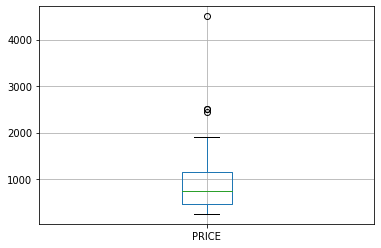

In [ ]:
df.boxplot(column=['PRICE'])
plt.show

In [ ]:
#Check the mean values
df['LIVING_AREA'].mean()

68.27956989247312

In [ ]:
#Check the median 
df['LIVING_AREA'].median()

65.0

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TYPE             3.00
POSTCODE        19.25
PRICE          688.75
LIVING_AREA     53.00
ROOMS            1.00
dtype: float64


In [ ]:
print(df['PRICE'].skew())
df['PRICE'].describe()

2.3931092033413135


count     212.000000
mean      865.136792
std       503.871594
min       255.000000
25%       461.250000
50%       752.500000
75%      1150.000000
max      4500.000000
Name: PRICE, dtype: float64

In [ ]:
print(df['PRICE'].quantile(0.10))
print(df['PRICE'].quantile(0.90))

400.0
1439.0000000000002


<function seaborn.utils.despine>

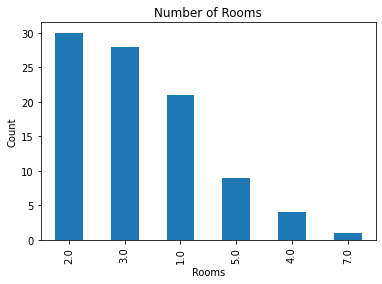

In [ ]:
df['ROOMS'].value_counts().plot(kind='bar')
plt.title('Number of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Count')
sns.despine

In [ ]:
print(df['PRICE'])

0      320.0
1      310.0
2      375.0
3      430.0
4      415.0
       ...  
88    1290.0
89     475.0
90    1500.0
91     360.0
92    1350.0
Name: PRICE, Length: 212, dtype: float64


We will analyze the features in their descending of correlation with sales price

Examining the data distributions of the features. We will start with the target variable, `PRICE`, to make sure it's normally distributed.

This is important because most machine learning algorithms make the assumption that the data is normally distributed. When data fits a normal distribution, statements about the price using analytical techniques will be made.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


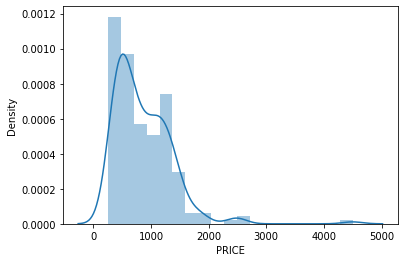

In [ ]:
sns.distplot(df['PRICE'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


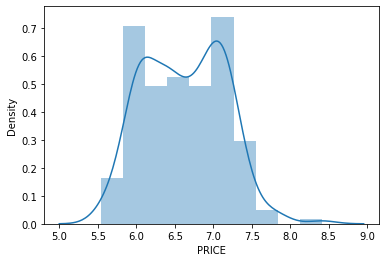

In [ ]:
# Transform the target variable 
sns.distplot(np.log(df.PRICE))



> We can see that the `PRICE` distribution is not skewed after the transformation, but normally distributed.
>The transformed data will be used in in the dataframe and remove the skewed distribution:


> **Normally distributed** means that the data is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. 







In [ ]:
df['LogOfPrice'] = np.log(df.PRICE)
df.drop(["PRICE"], axis=1, inplace=True)

Reviewing the skewness of each feature

In [ ]:
df.skew().sort_values(ascending=False)

ROOMS          0.942239
TYPE           0.331908
LIVING_AREA    0.283844
LogOfPrice     0.170493
POSTCODE      -0.808656
dtype: float64



>Values closer to zero are less skewed. The results show some features having a positive (right-tailed) or negative (left-tailed) skew.





Factor plot is informative when we have multiple groups to compare. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the onl

6.028279    15
7.047517     7
6.109248     5
6.345636     4
6.380123     4
            ..
7.153052     1
5.899897     1
6.993933     1
7.803843     1
7.210080     1
Name: LogOfPrice, Length: 123, dtype: int64

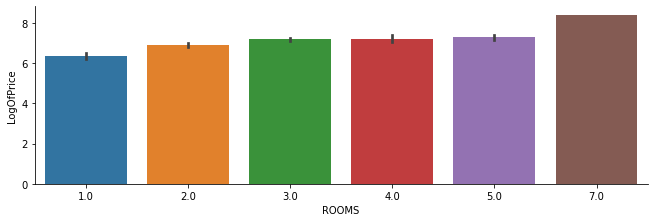

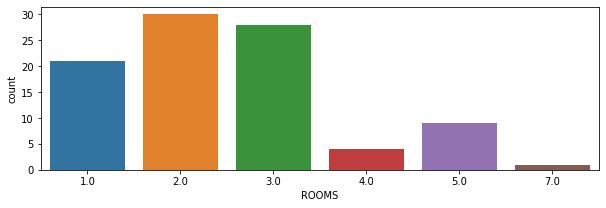

In [ ]:
sns.factorplot('ROOMS', 'LogOfPrice', data=df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('ROOMS', data=df)
df['LogOfPrice'].value_counts()

> Real estate with 5 rooms has the  highest `Price` while the sales of others with rooms of 2 is the most sold ones.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


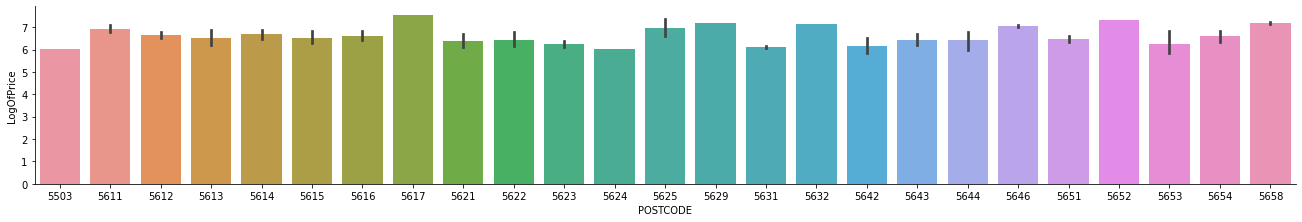

In [ ]:
#g = sns.factorplot(x='POSTCODE', y='Skewed_SP', col='PRICE', data=df, kind='bar', col_wrap=4, aspect=0.8)
sns.factorplot('POSTCODE', 'LogOfPrice', data=df,kind='bar',size=3,aspect=6)


>The diagram represents the `price` of a rpoperty, depending on its `postcode`.




# **Preparing the data for training the models**

**Train-Test Split dataset**


> Necessary imports

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 92
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TYPE         212 non-null    float64
 1   STREET NAME  212 non-null    object 
 2   POSTCODE     212 non-null    int64  
 3   LIVING_AREA  93 non-null     float64
 4   ROOMS        93 non-null     float64
 5   LogOfPrice   212 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 16.6+ KB


In [ ]:
df.isnull().sum()

TYPE             0
STREET NAME      0
POSTCODE         0
LIVING_AREA    119
ROOMS          119
LogOfPrice       0
dtype: int64

Analyzing the numeric features.


In [ ]:
numeric_features = df.select_dtypes(include=[np.number])

In [ ]:
numeric_features.columns

Index(['TYPE', 'POSTCODE', 'LIVING_AREA', 'ROOMS', 'LogOfPrice'], dtype='object')

Filling up the null values in order to train the model. 

In [ ]:
df.fillna(0)

,TYPE,STREET NAME,POSTCODE,LIVING_AREA,ROOMS,LogOfPrice
0,5.0,Willem,5611,0.0,0.0,5.768321
1,5.0,Willem,5611,0.0,0.0,5.736572
2,5.0,Julianastraat,5611,0.0,0.0,5.926926
3,5.0,Bennekelstraat,5654,0.0,0.0,6.063785
4,5.0,Leenderweg,5615,0.0,0.0,6.028279
...,...,...,...,...,...,...
88,3.0,Grote,5632,115.0,4.0,7.162397
89,2.0,Sebastiaan,5622,14.0,1.0,6.163315
90,3.0,van,5612,108.0,5.0,7.313220
91,2.0,Aalsterweg,5615,16.0,1.0,5.886104


In [ ]:
df.dropna(inplace=True)

In [ ]:
# set the target and predictors
y = df.LogOfPrice  # target

# use only those input features with numeric data type 
df_temp = df.select_dtypes(include=["int64","float64"]) 

X = df_temp.drop(["LogOfPrice"],axis=1)  # predictors

To split the dataset, I will use random sampling with 80/20 train-test split; that is, 80% of the dataset will be used for training and set aside 20% for testing:

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
df.isnull()

,TYPE,STREET NAME,POSTCODE,LIVING_AREA,ROOMS,LogOfPrice
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
88,False,False,False,False,False,False
89,False,False,False,False,False,False
90,False,False,False,False,False,False
91,False,False,False,False,False,False


# **Modelling**


Two models will be built and evaluated by their performances with R-squared metric. Additionally, insights on the features that are strong predictors of house prices, will be analised .

**Linear Regression**



To fit a linear regression model, the features which have a high correlation with the target variable PRICE are selected. By looking at the correlation matrix, it is noticable that the rooms and the living area have a strong correlation with the price ('Log of price').

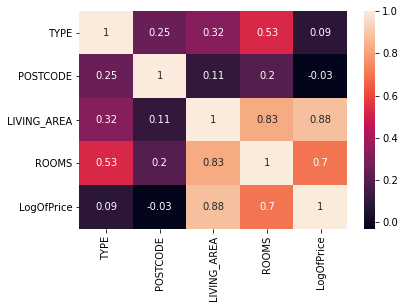

In [ ]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
lr = LinearRegression()
# fit optimal linear regression line on training data
lr.fit((X_train),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
>RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In this case, it is exactly 0.2, so it is relatively accurate.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# model evaluation for training set
y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))

The model performance for training set:
RMSE is 0.20765301137306907


In [ ]:
# model evaluation for testing set
y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
print("The model performance for testing set:")
print('RMSE is {}'.format(rmse))

The model performance for testing set:
RMSE is 0.1665026490419032


In [ ]:
#predict y_values using X_test set
yr_hat = lr.predict(X_test)

In [ ]:
lr_score =lr.score((X_test),y_test)
print("Accuracy: ", lr_score)

Accuracy:  0.8635924573514335


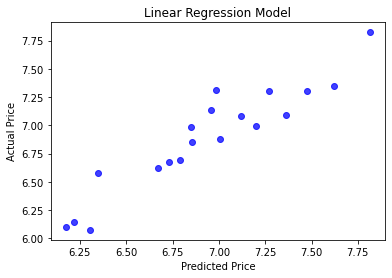

In [ ]:
actual_values = y_test
plt.scatter(yr_hat, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()
#pltrandom_state=None.show()

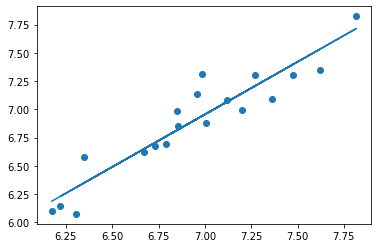

In [ ]:
from scipy import stats

#Execute a method that returns the important key values of Linear Regression
slope, intercept, r, p, std_err = stats.linregress(yr_hat, y_test)
#Create a function that uses the slope and intercept values to return a new value. This new value represents where on the y-axis the corresponding x value will be placed
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, yr_hat))
#Draw the scatter plot
plt.scatter(yr_hat, y_test)
#Draw the line of linear regression
plt.plot(yr_hat, mymodel)
plt.show()

Using cross-validation to see whether the model is over-fitting the data.

In [ ]:
# cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
lr_cv = cross_val_score(lr, X, y, cv = 5, scoring= 'r2')
print("Cross-validation results: ", lr_cv)
print("R2: ", lr_cv.mean())

Cross-validation results:  [0.87346696 0.76442401 0.80012497 0.66745531 0.5488312 ]
R2:  0.7308604883584712


>It doesn't appear that for this train-test dataset the model is  over-fitting the data (the cross-validation performance is very close in value). 

**Regularization:**


The alpha parameter in ridge and lasso regularizes the regression model. The regression algorithms with regularization differ from linear regression in that they try to penalize those features that are not significant in our prediction. Ridge will try to reduce their effects (i.e., shrink their coeffients) in order to optimize all the input features. Lasso will try to remove the not-significant features by making their coefficients zero. In short, Lasso (L1 regularization) can eliminate the not-significant features, thus performing feature selection while Ridge (L2 regularization) cannot.

**Lasso regression**

In [ ]:
lasso = Lasso(alpha = 1)  # sets alpha to almost zero as baseline
lasso.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

RMSE tells you how concentrated the data is around the line of best fit. 

In [ ]:
# model evaluation for training set
y_train_l_predict = lasso.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_l_predict)))

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))

The model performance for training set:
RMSE is 0.23581221443279687


RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In this case, it is 0.5, so it is relatively accurate.

In [ ]:
# model evaluation for testing set
y_test_l_predict = lasso.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_l_predict)))
print("The model performance for testing set:")
print('RMSE is {}'.format(rmse))

The model performance for testing set:
RMSE is 0.19371218192805603


RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In this case, it is 0.5, so it is relatively accurate.

In [ ]:
#predict y_values using X_test set
yr_lasso = lasso.predict(X_test)

In [ ]:
lasso_score =lasso.score((X_test),y_test)
print("Accuracy: ", lasso_score)

Accuracy:  0.8153667322347822


In [ ]:
lasso_cv = cross_val_score(lasso, X, y, cv = 5, scoring = 'r2')
print ("Cross-validation results: ", lasso_cv)
print ("R2: ", lasso_cv.mean())

Cross-validation results:  [0.82842652 0.66440621 0.69514684 0.59111828 0.48721021]
R2:  0.6532616143265344


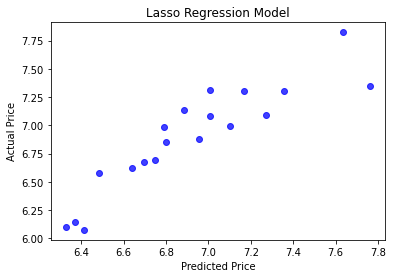

In [ ]:
actual_values = y_test
plt.scatter(yr_lasso, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regression Model')
plt.show()
#pltrandom_state=None.show()

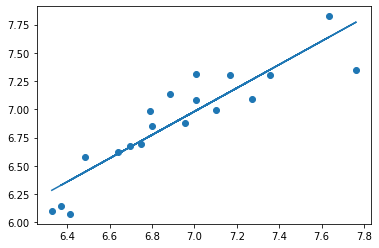

In [ ]:
from scipy import stats

#Execute a method that returns the important key values of Linear Regression
slope, intercept, r, p, std_err = stats.linregress(yr_lasso, y_test)
#Create a function that uses the slope and intercept values to return a new value. This new value represents where on the y-axis the corresponding x value will be placed
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, yr_lasso))
#Draw the scatter plot
plt.scatter(yr_lasso, y_test)
#Draw the line of linear regression
plt.plot(yr_lasso, mymodel)
plt.show()

**Ridge regression**

In [ ]:
ridge = Ridge(alpha = 1)  # sets alpha to a default value as baseline  
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
# model evaluation for training set
y_train_r_predict = ridge.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_r_predict)))

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))

The model performance for training set:
RMSE is 0.20767204734215916


>RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In this case, it is 0.2, so it is relatively accurate.

In [ ]:
# model evaluation for testing set
y_test_r_predict = ridge.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_r_predict)))
print("The model performance for testing set:")
print('RMSE is {}'.format(rmse))

The model performance for testing set:
RMSE is 0.16812086580920915


>RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In this case, it is rounded to 0.2, so it is relatively accurate.

In [ ]:
#predict y_values using X_test set
yr_ridge = ridge.predict(X_test)

In [ ]:
ridge_score =ridge.score((X_test),y_test)
print("Accuracy: ", ridge_score)

Accuracy:  0.8609281198121118


In [ ]:
ridge_cv = cross_val_score(ridge, X, y, cv = 5, scoring = 'r2')
print ("Cross-validation results: ", ridge_cv)
print ("R2: ", ridge_cv.mean())

Cross-validation results:  [0.87430768 0.76335975 0.79883498 0.67112458 0.54775124]
R2:  0.7310756447849953


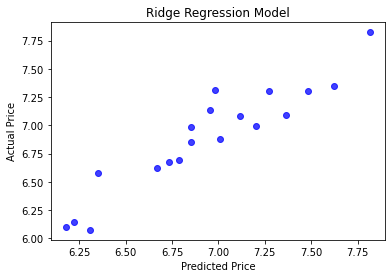

In [ ]:
actual_values = y_test
plt.scatter(yr_ridge, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regression Model')
plt.show()
#pltrandom_state=None.show()

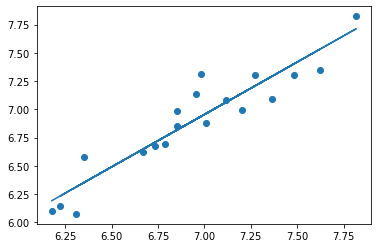

In [ ]:
from scipy import stats

#Execute a method that returns the important key values of Linear Regression
slope, intercept, r, p, std_err = stats.linregress(yr_ridge, y_test)
#Create a function that uses the slope and intercept values to return a new value. This new value represents where on the y-axis the corresponding x value will be placed
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, yr_ridge))
#Draw the scatter plot
plt.scatter(yr_ridge, y_test)
#Draw the line of linear regression
plt.plot(yr_ridge, mymodel)
plt.show()

**Random Forest**

The library sklearn.ensemble is used to solve regression problems via Random forest. The most important parameter is the n_estimators parameter. This parameter defines the number of trees in the random forest.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Evaluating the Algorithm:
The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error.

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12552548827951324
Mean Squared Error: 0.024254698257395242
Root Mean Squared Error: 0.15573919948874543


Training the model

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Making predictions on the test set:

When performing regression, the absolute error should be used.It needs to be checked how far away the average prediction is from the actual value so the absolute value has to be calculated.

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.13 degrees.




> There is a 0.12 improvement.



Determine performance metrics:

To put the predictions in perspective, accuracy can be calculated by using the mean average percentage error subtracted from 100 %.

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors /y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.13 %.


> The model has learned how to predict the price with 98% accuracy.

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train) # gets the parameters for the rfr model
rfr_cv = cross_val_score(rfr,X, y, cv = 5, scoring = 'r2')
print("R2: ", rfr_cv.mean())

The performance of Random forest is slightly better than the Linear regression. The model parameters can be optimised for better performance using gridsearch.

In [ ]:
#Random forest determined feature importances
rfr.feature_importances_

# **Plotting the Feature Importance**

Finding the features that are the most promissing predictors:

In [ ]:
importance = rfr.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)

#list(feature_importances)
sorted_feature_importances = sorted(feature_importances, reverse = True)

#print(sorted_feature_importances)
top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

**Plotting the feauture importance of the Random forest.**

Plotting the feature importances to illustrate the disparities in the relative significance of the variables. 

In [ ]:
plt.figure()
plt.title( "Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

The idea behind the plotting of feauture importance is that after evaluating the performance of the model, the values of a feature of interest must be permuted and reevaluate model performance.
The feature importance (variable importance) describes which features are relevant. 
>Random Forest determined that overall the living area of a home is by far the most important predictor. Following are the sizes of above rooms and postcode.

# **Conclusion**
**Data collection:**

For the data collection part, I decided to use `web scraping` as e technique because it gives the opportunity to work with a data set that is up to date and therefore, makes more accurate summaries.

**Data preprocessing:**

I tried different types of data transforms to expose the data structure better, so we may be able to improve model accuracy later.

*   `Standardizing` was made to the data set so as to reduce the effects of differing distributions.
*   `The skewness` of the features was checked in order to see how distorted a data sample is from the normal distribution.
* `Rescaling (normalizing)` the dataset was also included to reduce the effects of differing scales

**Modelling:**

I used four models to determine the accuracy - Linear Regression, Lasso Regression and Ridge Regression, Random Forest.

From the exploring of the models RMSE:

* Linear Regression score: 0.2003 (0.1887)

* Lasso score: 0.5 (0.4675)

* Ridge score: 0.2 (0.1877)

* Random forest score: 0.2372 

> RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. All of the models showed values in this range.

From the exploring of the models accuracy: 

* Linear Regression score:  0.80 (80%)

* Lasso score: 0.82 (82%)

* Ridge score: 0.86 (86%)

* Random forest score: 98.13 %

From the exploring of the models cross-validation:  

* Linear Regression score:  R2: 0.7308604883584712

* Lasso score: R2:  0.6532616143265344

* Ridge score: R2:  0.7310756447849953

* Random forest: R2:  0.7742740242196954

Random forest turns out to be the more accurate model for predicting the house price. 

All of the models showed RMSE values between 0.2 and 0.5 so that they show  relatively accurate predictions of the data. 

I evaluated the models performances with R-squared metric and the one that is overfitting the least is the Linear Regression.


